## 여러 개의 데이터프레임 합치기

In [4]:
import pandas as pd
import numpy as np

In [1]:
# 서로 다른 데이터 프레임을 하나로 합치는 작업
# 1. 하나의 데이터 프레임데 다른 데이터 프레임을 연속적으로 붙임 (concatenating :연결)
# 2. 공통적으로 포함된 하나의 열을 기준으로 삼아 붙음 (merging : 병햡) - 이거 해봄

In [91]:
d1 = pd.DataFrame({"key": list("bbacaab"),
                  "data1":range(7)})
d2 = pd.DataFrame({"key": list("abd"),
                  "data2":range(3)})

In [92]:
d1

,key,data1
0,b,0
1,b,1
2,a,2
3,c,3
4,a,4
5,a,5
6,b,6


In [93]:
d2

,key,data2
0,a,0
1,b,1
2,d,2


In [95]:
pd.merge(d1,d2,on="key") # key 열을 기준으로 병합 c,d는 공통된 값이 아니라서 존재x

,key,data1,data2
0,b,0,1
1,b,1,1
2,b,6,1
3,a,2,0
4,a,4,0
5,a,5,0


In [96]:
pd.merge(d1,d2,on="key",how="outer") # 한쪽에만 있는 값들도 출력

,key,data1,data2
0,b,0.0,1.0
1,b,1.0,1.0
2,b,6.0,1.0
3,a,2.0,0.0
4,a,4.0,0.0
5,a,5.0,0.0
6,c,3.0,NaN
7,d,NaN,2.0


In [97]:
pd.merge(d1,d2,on="key",how="left") #d1을 기준으로 d2의 값을 붙임

,key,data1,data2
0,b,0,1.0
1,b,1,1.0
2,a,2,0.0
3,c,3,NaN
4,a,4,0.0
5,a,5,0.0
6,b,6,1.0


In [105]:
d1 = pd.DataFrame({"key": list("bbacab"),
                  "data1":range(6)})
d2 = pd.DataFrame({"key": list("ababd"),
                  "data2":range(5)})

In [106]:
d1

,key,data1
0,b,0
1,b,1
2,a,2
3,c,3
4,a,4
5,b,5


In [107]:
d2

,key,data2
0,a,0
1,b,1
2,a,2
3,b,3
4,d,4


In [108]:
pd.merge(d1,d2,on="key",how="inner")

,key,data1,data2
0,b,0,1
1,b,0,3
2,b,1,1
3,b,1,3
4,b,5,1
5,b,5,3
6,a,2,0
7,a,2,2
8,a,4,0
9,a,4,2


In [109]:
pd.merge(d1,d2,on="key",how="outer")

,key,data1,data2
0,b,0.0,1.0
1,b,0.0,3.0
2,b,1.0,1.0
3,b,1.0,3.0
4,b,5.0,1.0
5,b,5.0,3.0
6,a,2.0,0.0
7,a,2.0,2.0
8,a,4.0,0.0
9,a,4.0,2.0


In [113]:
d3 = pd.DataFrame({"lkey": list("bbacaab"),
                  "data1":range(7)})
d4 = pd.DataFrame({"rkey": list("abd"),
                  "data2":range(3)})

In [114]:
d3

,lkey,data1
0,b,0
1,b,1
2,a,2
3,c,3
4,a,4
5,a,5
6,b,6


In [115]:
d4

,rkey,data2
0,a,0
1,b,1
2,d,2


In [116]:
pd.merge(d3,d4,left_on="lkey",right_on="rkey")
# left_on : 앞에 나오는 인자의 해당하는 데이터 프레임에서 merging할때 참조할 열

,lkey,data1,rkey,data2
0,b,0,b,1
1,b,1,b,1
2,b,6,b,1
3,a,2,a,0
4,a,4,a,0
5,a,5,a,0


In [120]:
left1=pd.DataFrame({'key':["a","b","a","a","b","c"],"value":range(6)})
right1=pd.DataFrame({"group_val":[3.5,7]}, index=['a','b'])

In [121]:
left1

,key,value
0,a,0
1,b,1
2,a,2
3,a,3
4,b,4
5,c,5


In [122]:
right1

,group_val
a,3.5
b,7.0


In [ ]:
# left1의 열과 right1의 인덱스를 merging

In [123]:
pd.merge(left1,right1,left_on="key",right_index=True)

,key,value,group_val
0,a,0,3.5
2,a,2,3.5
3,a,3,3.5
1,b,1,7.0
4,b,4,7.0


In [124]:
pd.merge(right1,left1,left_index=True,right_on="key")

,group_val,key,value
0,3.5,a,0
2,3.5,a,2
3,3.5,a,3
1,7.0,b,1
4,7.0,b,4


In [126]:
left2 = pd.DataFrame([[1.,2.],[3.,4.,],[5.,6.]],
                    index=['a','c','e'],columns=["seoul","incheon"])
right2 = pd.DataFrame([[7.,8.],[9.,10.],[11.,12.],[13,14]],
                     index=["b","c","d","e"],columns=["daegu","ulsan"])

In [127]:
left2

,seoul,incheon
a,1.0,2.0
c,3.0,4.0
e,5.0,6.0


In [128]:
right2

,daegu,ulsan
b,7.0,8.0
c,9.0,10.0
d,11.0,12.0
e,13.0,14.0


In [129]:
pd.merge(left2,right2,how="outer",left_index=True,right_index=True)

,seoul,incheon,daegu,ulsan
a,1.0,2.0,NaN,NaN
b,NaN,NaN,7.0,8.0
c,3.0,4.0,9.0,10.0
d,NaN,NaN,11.0,12.0
e,5.0,6.0,13.0,14.0


In [ ]:
# concatenating

In [130]:
s1 = pd.Series([0,1],index=["a","b"])
s2 = pd.Series([2,3,4],index=["c","d","e"])
s3 = pd.Series([5,6],index=["f","g"])

In [131]:
s1

a    0
b    1
dtype: int64

In [132]:
s2

c    2
d    3
e    4
dtype: int64

In [133]:
s3

f    5
g    6
dtype: int64

In [134]:
pd.concat([s1,s2,s3])

a    0
b    1
c    2
d    3
e    4
f    5
g    6
dtype: int64

In [135]:
pd.concat([s1,s2,s3],axis=1)

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,0,1,2
a,0.0,NaN,NaN
b,1.0,NaN,NaN
c,NaN,2.0,NaN
d,NaN,3.0,NaN
e,NaN,4.0,NaN
f,NaN,NaN,5.0
g,NaN,NaN,6.0


In [136]:
s4 =pd.concat([s1*5,s3])

In [138]:
pd.concat([s1,s4],axis=1)

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,0,1
a,0.0,0
b,1.0,5
f,NaN,5
g,NaN,6


In [139]:
s4

a    0
b    5
f    5
g    6
dtype: int64

In [140]:
s1

a    0
b    1
dtype: int64

In [ ]:
# 컬럼의 이름을 정해주자

In [142]:
pd.concat([s1,s2,s3],axis=1,keys=["one","two","three"])

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,one,two,three
a,0.0,NaN,NaN
b,1.0,NaN,NaN
c,NaN,2.0,NaN
d,NaN,3.0,NaN
e,NaN,4.0,NaN
f,NaN,NaN,5.0
g,NaN,NaN,6.0


In [143]:
f1 =pd.DataFrame(np.arange(6).reshape(3,2),
                index=['a','b','c'],columns=["one","two"])
f2 =pd.DataFrame(5+np.arange(4).reshape(2,2),
                index=["a","c"], columns=["three","four"])

In [144]:
f1

,one,two
a,0,1
b,2,3
c,4,5


In [145]:
f2

,three,four
a,5,6
c,7,8


In [146]:
pd.concat([f1,f2], axis=1)

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,one,two,three,four
a,0,1,5.0,6.0
b,2,3,NaN,NaN
c,4,5,7.0,8.0


In [147]:
f3 =pd.DataFrame(np.random.randn(3,4), columns=["a","b","c","d"])
f4 =pd.DataFrame(np.random.randn(2,3),columns=["b","d","a"])

In [148]:
f3

,a,b,c,d
0,2.253203,-1.417619,-2.270429,0.043200
1,0.779799,-0.310769,-0.709004,0.452870
2,-0.083804,-0.724264,-0.237150,-0.944813


In [149]:
f4

,b,d,a
0,1.032592,0.510121,-0.887712
1,0.729835,-0.553066,-1.094857


In [150]:
pd.concat([f3,f4])

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,a,b,c,d
0,2.253203,-1.417619,-2.270429,0.043200
1,0.779799,-0.310769,-0.709004,0.452870
2,-0.083804,-0.724264,-0.237150,-0.944813
0,-0.887712,1.032592,NaN,0.510121
1,-1.094857,0.729835,NaN,-0.553066


In [151]:
pd.concat([f3,f4],ignore_index=True) # 인덱스가 0부터 생성

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,a,b,c,d
0,2.253203,-1.417619,-2.270429,0.043200
1,0.779799,-0.310769,-0.709004,0.452870
2,-0.083804,-0.724264,-0.237150,-0.944813
3,-0.887712,1.032592,NaN,0.510121
4,-1.094857,0.729835,NaN,-0.553066


## 계층적 인덱싱 이해하기

In [5]:
s = pd.Series(np.random.randn(10),
             index=[["a","a","a","b","b","b","c","c","d","d"],
                   [1,2,3,1,2,3,1,2,2,3]])

In [6]:
s

a  1    0.438780
   2    2.589578
   3    1.559342
b  1   -1.111526
   2   -2.463147
   3   -1.095615
c  1   -0.463696
   2   -0.844985
d  2    1.177587
   3    0.747616
dtype: float64

In [7]:
# 두 층의 인덱스가 나옴
#첫번째 층 a~d 
#첫 인덱스 각 각에 대해 정수 인덱스 1~3 가 부여

In [9]:
s.index #멀티인덱스라고 알려줌

MultiIndex([('a', 1),
            ('a', 2),
            ('a', 3),
            ('b', 1),
            ('b', 2),
            ('b', 3),
            ('c', 1),
            ('c', 2),
            ('d', 2),
            ('d', 3)],
           )

In [10]:
# 계층적 인덱스의 원칙
# 항상 맨 바깥쪽 인덱스 부터 차례로 인덱싱 해줘야함

In [11]:
s["b"]

1   -1.111526
2   -2.463147
3   -1.095615
dtype: float64

In [12]:
# 해당 인덱스의 하위층의 인덱스 값을 시리즈형태로 얻을 수 있음

In [13]:
s["b":"c"] #범위 인덱스 명시

b  1   -1.111526
   2   -2.463147
   3   -1.095615
c  1   -0.463696
   2   -0.844985
dtype: float64

In [14]:
# 두 층에 해당하는 하위 층이 표시됨.

In [15]:
s[("b",3)]

-1.0956152498734113

In [16]:
#소괄호를 열고 닫을 떄
#기존의 b라는 인덱스의 하위 인덱스 3의 값을 얻은 것.

In [18]:
s[:,2]

a    2.589578
b   -2.463147
c   -0.844985
d    1.177587
dtype: float64

In [19]:
# 첫번쨰 인덱스를 모두 고려하고 두번쨰 인덱스의 2를 고려해라

In [20]:
df = pd.DataFrame(np.arange(12).reshape((4,3)),
                  index=[["a","a","b","b"],[1,2,1,2]],
                  columns=[["Seoul","Seoul","Busan"],
                          ["Green","Red","Green"]])

In [21]:
df

Seoul     Busan
    Green Red Green
a 1     0   1     2
  2     3   4     5
b 1     6   7     8
  2     9  10    11

In [22]:
df.index.names= ["key1","key2"]

In [23]:
df.columns.names=["city","color"]

In [24]:
df

city      Seoul     Busan
color     Green Red Green
key1 key2                
a    1        0   1     2
     2        3   4     5
b    1        6   7     8
     2        9  10    11

In [25]:
df["Seoul"] # 서울의 하위에 해당하는 값만 출력

color      Green  Red
key1 key2            
a    1         0    1
     2         3    4
b    1         6    7
     2         9   10

In [26]:
df[("Seoul","Green")] #서울-그린에 해당하는 열을 뽑음

key1  key2
a     1       0
      2       3
b     1       6
      2       9
Name: (Seoul, Green), dtype: int32

In [27]:
df.loc["a"] #행에 대한 인덱싱

city  Seoul     Busan
color Green Red Green
key2                 
1         0   1     2
2         3   4     5

In [28]:
df.loc[("a",1)] #a라는 인덱스에서 하위인덱스 1만 뽑음

city   color
Seoul  Green    0
       Red      1
Busan  Green    2
Name: (a, 1), dtype: int32

In [30]:
df.loc["b",("Seoul","Red")]

key2
1     7
2    10
Name: (Seoul, Red), dtype: int32

In [ ]:
# level : 몇 번째 계층에 해당하는 인덱스 또는 열의 값을 기준으로 정할것인가.

In [32]:
df.sort_index(axis=0,level=0) # level=0 행방향 정렬을 하되 최상위 인덱스(key1)을 기준으로 오름차순 정렬

city      Seoul     Busan
color     Green Red Green
key1 key2                
a    1        0   1     2
     2        3   4     5
b    1        6   7     8
     2        9  10    11

In [33]:
df.sort_index(axis=0,level=1) # level=1 key2의 값을 기준으로 오름차순

city      Seoul     Busan
color     Green Red Green
key1 key2                
a    1        0   1     2
b    1        6   7     8
a    2        3   4     5
b    2        9  10    11

In [34]:
df.sort_index(axis=0,level="key2") #원하는 인덱스의 이름을 명시해도 상관없음.

city      Seoul     Busan
color     Green Red Green
key1 key2                
a    1        0   1     2
b    1        6   7     8
a    2        3   4     5
b    2        9  10    11

In [35]:
# 열방향으로 정렬을 하고 싶을 떄.

In [37]:
df.sort_index(axis=1,level=0) # 열방향으로 정렬하고 최상위 인덱스인 city를 기준으로 오름차순 정렬

city      Busan Seoul    
color     Green Green Red
key1 key2                
a    1        2     0   1
     2        5     3   4
b    1        8     6   7
     2       11     9  10

In [38]:
df.sort_index(axis=1,level=1) # color를 기준으로 오름차순 정렬

city      Busan Seoul    
color     Green Green Red
key1 key2                
a    1        2     0   1
     2        5     3   4
b    1        8     6   7
     2       11     9  10

In [43]:
df.sort_values(by=("Busan","Green")) # 계층적 인덱스에 해당하는 열이나 행을 명시하고 싶을떄, 부산과 그린에 대해서 정렬

city      Seoul     Busan
color     Green Red Green
key1 key2                
a    1        0   1     2
     2        3   4     5
b    1        6   7     8
     2        9  10    11

In [44]:
# 통계함수 적용

In [45]:
# 특정 인덱스의 합 계산

In [46]:
df.sum(axis=0,level=0) # key1을 기준으로 합을 구함

city  Seoul     Busan
color Green Red Green
key1                 
a         3   5     7
b        15  17    19

In [47]:
df.sum(axis=0,level=1) # key2를 기준으로 key2가 1인 값들과 2인 값들 끼리 합

city  Seoul     Busan
color Green Red Green
key2                 
1         6   8    10
2        12  14    16

In [48]:
df

city      Seoul     Busan
color     Green Red Green
key1 key2                
a    1        0   1     2
     2        3   4     5
b    1        6   7     8
     2        9  10    11

In [49]:
# 평균을 구해보자

In [53]:
df.mean(axis=1,level="color")

color      Green  Red
key1 key2            
a    1         1    1
     2         4    4
b    1         7    7
     2        10   10

In [ ]:
#열방향으로 평균을 구함
#color에 해당하는 값을 기준으로 green열, red열끼리 평균을 구함

In [ ]:
---------------------------------------------------

In [ ]:
# 특정 열에 포함되있는 값을 계층적 인덱스로 변환

In [54]:
df2 =pd.DataFrame({'a':range(7),'b':range(7,0,-1),
                  'c':['one','one','one','two','two','two','two'],
                  'd':[0,1,2,0,1,2,3]})

In [61]:
df2

,a,b,c,d
0,0,7,one,0
1,1,6,one,1
2,2,5,one,2
3,3,4,two,0
4,4,3,two,1
5,5,2,two,2
6,6,1,two,3


In [56]:
# c ,d 를 계층적 인덱스로 변환하고자 할 때.

In [62]:
df3=df2.set_index(["c","d"])

In [63]:
df3

a  b
c   d      
one 0  0  7
    1  1  6
    2  2  5
two 0  3  4
    1  4  3
    2  5  2
    3  6  1

In [ ]:
# c라는 값이 one two에 따라서 d라는 계층의 값이 0~3으로 명시. 

In [ ]:
# c,d를 인덱스에 넣으면서 기존의 값을 유지하고 싶을 때

In [64]:
df2.set_index(["c","d"], drop=False) # drop이라는 인자 사용

a  b    c  d
c   d              
one 0  0  7  one  0
    1  1  6  one  1
    2  2  5  one  2
two 0  3  4  two  0
    1  4  3  two  1
    2  5  2  two  2
    3  6  1  two  3

In [65]:
df3

a  b
c   d      
one 0  0  7
    1  1  6
    2  2  5
two 0  3  4
    1  4  3
    2  5  2
    3  6  1

In [67]:
df3.reset_index() #현존하는 인덱스를 컬럼으로 올리고 정수로 대치

,c,d,a,b
0,one,0,0,7
1,one,1,1,6
2,one,2,2,5
3,two,0,3,4
4,two,1,4,3
5,two,2,5,2
6,two,3,6,1


In [69]:
df4 = pd.DataFrame(np.arange(6).reshape((2,3)),
                  index=['seoul','busan'],
                  columns=['one','two','three'])
df4.index.name="city"
df4.columns.name="number"

In [70]:
df4

number,one,two,three
city,,,
seoul,0,1,2
busan,3,4,5


In [ ]:
# stack : 현재 데이터 프레임에서 최하위 컬럼이 현재 인덱스의 최하위 인덱스로 붙음

In [74]:
df5=df4.stack() 

In [75]:
df5

city   number
seoul  one       0
       two       1
       three     2
busan  one       3
       two       4
       three     5
dtype: int32

In [72]:
# stack과 set_index 차이점

In [ ]:
# set_index : 기존의 인덱스를 새로 대체하면서 지정한 열이 가질 수 있는 값들이 인덱스
# stack : 현재의 컬럼 자체가 현재 인덱스의 최하위 인덱스로 붙음

In [76]:
df5.unstack() # stack의 반대 

number,one,two,three
city,,,
seoul,0,1,2
busan,3,4,5


In [ ]:
# 특정층의 인덱스를 컬럼으로 올리고 싶을 때

In [77]:
df5.unstack(level=0)

city,seoul,busan
number,,
one,0,3
two,1,4
three,2,5


In [78]:
df5.unstack(level="city")

city,seoul,busan
number,,
one,0,3
two,1,4
three,2,5


In [81]:
s1 = pd.Series([0,1,2,3],index=['a','b','c','d'])
s2 = pd.Series([4,5,6],index=['c','d','e'])
s3 = pd.concat([s1,s2],keys=["one","two"])

In [82]:
s3

one  a    0
     b    1
     c    2
     d    3
two  c    4
     d    5
     e    6
dtype: int64

In [84]:
s3.unstack() # 최하위 인덱스가 컬럼으로 올라감

,a,b,c,d,e
one,0.0,1.0,2.0,3.0,NaN
two,NaN,NaN,4.0,5.0,6.0


In [85]:
df6 = pd.DataFrame({"left":df5, "right":df5+5},
                  columns={"left","right"})
df6.columns.name="side"

In [87]:
df6

side          right  left
city  number             
seoul one         5     0
      two         6     1
      three       7     2
busan one         8     3
      two         9     4
      three      10     5

In [88]:
df6.unstack()

side   right           left          
number   one two three  one two three
city                                 
seoul      5   6     7    0   1     2
busan      8   9    10    3   4     5

In [89]:
df6.unstack(level="city")

side   right        left      
city   seoul busan seoul busan
number                        
one        5     8     0     3
two        6     9     1     4
three      7    10     2     5

In [90]:
df6.unstack(level="city").stack(level="side")

city          busan  seoul
number side               
one    left       3      0
       right      8      5
two    left       4      1
       right      9      6
three  left       5      2
       right     10      7

## 데이터 변형하기

In [153]:
df = pd.DataFrame({"k1":["one"]*3+["two"]*4,
                  "k2":[1,1,2,3,3,4,4]})

In [154]:
df

,k1,k2
0,one,1
1,one,1
2,one,2
3,two,3
4,two,3
5,two,4
6,two,4


In [155]:
df.duplicated() # 중복된 부분이 true

0    False
1     True
2    False
3    False
4     True
5    False
6     True
dtype: bool

In [157]:
df.drop_duplicates() # 중복된 행의 값들이 제거 유니크한 값들만 남음.

,k1,k2
0,one,1
2,one,2
3,two,3
5,two,4


In [158]:
df["v1"] = np.arange(7)

In [159]:
df

,k1,k2,v1
0,one,1,0
1,one,1,1
2,one,2,2
3,two,3,3
4,two,3,4
5,two,4,5
6,two,4,6


In [161]:
df.drop_duplicates(["k1"]) #k1열의 값만을 보고 중복된것을 제거

,k1,k2,v1
0,one,1,0
3,two,3,3


In [164]:
df.drop_duplicates(["k1","k2"], keep="last") 
# k1,k2값을 기준으로 중복된 것을 제거할때 맨 마지막에 등장한 행이 남게됨.

,k1,k2,v1
1,one,1,1
2,one,2,2
4,two,3,4
6,two,4,6


In [165]:
df.drop_duplicates(["k1","k2"], keep="first")

,k1,k2,v1
0,one,1,0
2,one,2,2
3,two,3,3
5,two,4,5


In [166]:
df.drop_duplicates(["k1","k2"])

,k1,k2,v1
0,one,1,0
2,one,2,2
3,two,3,3
5,two,4,5


In [167]:
# 유한개의 값을 가지는 열의 값을 더 적은 수의 값으로 매핑

In [171]:
df2 =pd.DataFrame({"food":["bacon","pulled pork","bacon","pastrami",
                           "corned beef","Bacon","pastrami","honey ham",
                          "nova lox"],
                  "ounces":[4,3,12,6,7.5,8,3,5,6]})

In [172]:
df2

,food,ounces
0,bacon,4.0
1,pulled pork,3.0
2,bacon,12.0
3,pastrami,6.0
4,corned beef,7.5
5,Bacon,8.0
6,pastrami,3.0
7,honey ham,5.0
8,nova lox,6.0


In [174]:
meat_to_animal={
    'bacon':'pig',
    'pulled pork':'pig',
    'pastrami':'cow',
    'corned beef':'cow',
    'honey ham':'pig',
    'nova lox':'salmon'
} # 딕션너리 정의

In [176]:
df2["animal"]=df2["food"].apply(lambda x:meat_to_animal[x.lower()])
# animal이라는 열을 추가
# food열의 값을 가져옴 -> 성분 하나하나가 x 값 (key값)
# lower()함수로 소문자로 치환한 후
# value값을 meat_to_animal에서 가져와서 
# df2의 animal 값에 저장

In [178]:
df2

,food,ounces,animal
0,bacon,4.0,pig
1,pulled pork,3.0,pig
2,bacon,12.0,pig
3,pastrami,6.0,cow
4,corned beef,7.5,cow
5,Bacon,8.0,pig
6,pastrami,3.0,cow
7,honey ham,5.0,pig
8,nova lox,6.0,salmon


In [180]:
s =pd.Series([1.,-999.,2.,-999.,-1000.,3.])

In [181]:
s

0       1.0
1    -999.0
2       2.0
3    -999.0
4   -1000.0
5       3.0
dtype: float64

In [ ]:
# 이상치를 검출

In [182]:
# replace(찾고자하는값,np.바꿔줄값)

In [183]:
s2 = s.replace(-999,np.nan)

In [184]:
s2

0       1.0
1       NaN
2       2.0
3       NaN
4   -1000.0
5       3.0
dtype: float64

In [185]:
s2.replace(np.nan,0)

0       1.0
1       0.0
2       2.0
3       0.0
4   -1000.0
5       3.0
dtype: float64

In [186]:
s2.fillna(0)

0       1.0
1       0.0
2       2.0
3       0.0
4   -1000.0
5       3.0
dtype: float64

In [ ]:
# 카테고리 (범주형) 데이터를 관리하기 위해서 
# 판다스에서 categories라는 특별한 자료형제공
# 각종 통계분석을 간단하게 해줌

In [24]:
df3 =pd.DataFrame({"id":[1,2,3,4,5,6], "raw_grade":["a","b","b","a","a","e"]})

In [25]:
df3

,id,raw_grade
0,1,a
1,2,b
2,3,b
3,4,a
4,5,a
5,6,e


In [26]:
df3["grade"]=df3["raw_grade"].astype("category")

In [27]:
df3

,id,raw_grade,grade
0,1,a,a
1,2,b,b
2,3,b,b
3,4,a,a
4,5,a,a
5,6,e,e


In [28]:
df3["grade"] 
#해당 열이 categories 라는 자료형의 시리즈라는 의미
# a,b,e 세가지 카테고리를 가질 수 있다.

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): [a, b, e]

In [29]:
df3["grade"].cat.categories  
# grade가 가질 수 있는 카테고리 값들이 인덱스 형태로 나타남

Index(['a', 'b', 'e'], dtype='object')

In [30]:
df3["grade"].cat.categories=["very good","good","very bad"] 
# a,b,e에 해당 하는 값들이 순서대로 바뀜

In [31]:
df3

,id,raw_grade,grade
0,1,a,very good
1,2,b,good
2,3,b,good
3,4,a,very good
4,5,a,very good
5,6,e,very bad


In [20]:
# set_categories[] : 열에 대해서 기존 카테고리의 개수를 늘리거나 줄일때

In [32]:
df3["grade"] = df3["grade"].cat.set_categories(["very bad","bad","medium","good","very good"])

In [33]:
df3

,id,raw_grade,grade
0,1,a,very good
1,2,b,good
2,3,b,good
3,4,a,very good
4,5,a,very good
5,6,e,very bad


In [36]:
df3["grade"] # 카테고리의 개수가 늘어남

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): [very bad, bad, medium, good, very good]

In [37]:
df3.sort_values(by="grade") 

,id,raw_grade,grade
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


In [38]:
ages = [20,22,25,27,21,23,37,31,61,45,41,32]
bins = [18,25,35,60,100] # age를 적당한 구간으로 잘라낼 숫자

In [41]:
cats = pd.cut(ages,bins)

In [42]:
cats

[(18, 25], (18, 25], (18, 25], (25, 35], (18, 25], ..., (25, 35], (60, 100], (35, 60], (35, 60], (25, 35]]
Length: 12
Categories (4, interval[int64]): [(18, 25] < (25, 35] < (35, 60] < (60, 100]]

In [43]:
cats.categories

IntervalIndex([(18, 25], (25, 35], (35, 60], (60, 100]],
              closed='right',
              dtype='interval[int64]')

In [44]:
cats.codes # 기존의 ages리스트의 각 성분이 몇번째 카테고리에 부여되었는지

array([0, 0, 0, 1, 0, 0, 2, 1, 3, 2, 2, 1], dtype=int8)

In [46]:
cats.value_counts()

(18, 25]     5
(25, 35]     3
(35, 60]     3
(60, 100]    1
dtype: int64

In [47]:
group_name = ["youth","youngadult","middleaged","senior"]

In [49]:
pd.cut(ages,bins,labels=group_name)

[youth, youth, youth, youngadult, youth, ..., youngadult, senior, middleaged, middleaged, youngadult]
Length: 12
Categories (4, object): [youth < youngadult < middleaged < senior]

In [50]:
data = np.random.rand(20)

In [51]:
data

array([0.19994014, 0.34473275, 0.48239498, 0.29106198, 0.49523418,
       0.58382791, 0.7309204 , 0.16128606, 0.93231261, 0.58003872,
       0.83889417, 0.01417629, 0.39500375, 0.0113793 , 0.82107304,
       0.16834911, 0.69577694, 0.195513  , 0.34780691, 0.10110732])

In [55]:
pd.cut(data,4,precision=2) 
# 4개의 카테고리로 data를 나눔 , precision=2 소수점 2번째 자리까지 명시

[(0.01, 0.24], (0.24, 0.47], (0.47, 0.7], (0.24, 0.47], (0.47, 0.7], ..., (0.01, 0.24], (0.47, 0.7], (0.01, 0.24], (0.24, 0.47], (0.01, 0.24]]
Length: 20
Categories (4, interval[float64]): [(0.01, 0.24] < (0.24, 0.47] < (0.47, 0.7] < (0.7, 0.93]]

In [56]:
data2 = np.random.randn(1000)

In [63]:
data2[:5]

array([-0.64259195, -1.2332319 , -0.10926615, -1.00601297, -0.54956081])

In [64]:
cats = pd.qcut(data2,4) 
#qcut : 지정한 개수만큼 구간을 정의를 하되 그 분위수 까지 구분값으로 함
# 사분위수가 각각 들어감

In [65]:
cats

[(-0.649, 0.0559], (-3.1479999999999997, -0.649], (-0.649, 0.0559], (-3.1479999999999997, -0.649], (-0.649, 0.0559], ..., (0.0559, 0.738], (0.0559, 0.738], (0.738, 3.189], (-3.1479999999999997, -0.649], (-3.1479999999999997, -0.649]]
Length: 1000
Categories (4, interval[float64]): [(-3.1479999999999997, -0.649] < (-0.649, 0.0559] < (0.0559, 0.738] < (0.738, 3.189]]

## 데이터 그룹화 함수 이해하기

In [5]:
df = pd.DataFrame({"key1":["a","a","b","b","a"],
                  "key2" : ["one","two","one","two","one"],
                  "data1":np.random.randn(5),
                  "data2":np.random.randn(5)})

In [67]:
df

,key1,key2,data1,data2
0,a,one,-0.443628,-0.137623
1,a,two,-1.952523,-1.993543
2,b,one,1.366935,-0.000051
3,b,two,-1.758718,1.035331
4,a,one,0.690671,0.207167


In [6]:
grouped = df["data1"].groupby(df["key1"])
#data1의 통계량을 계산을 하되 key1의 값을 기준으로 데이터를 그룹화한후 실행

In [7]:
grouped # 어떤 통계량을 사용할것인지 명시하지 않아서 결과값이 안나옴

In [8]:
grouped.mean()

key1
a   -0.649280
b   -0.752219
Name: data1, dtype: float64

In [9]:
# 그룹화의 흐름 : split - apply - combine 
# 데이터를 나누고 통계함수를 적용 후 최종적인 통계량을 산출하여 표시

In [13]:
means = df["data1"].groupby([df["key1"],df["key2"]]).mean()

In [14]:
means #key1,key2에 대해서 계층적 인덱스가 생성

key1  key2
a     one    -0.686341
      two    -0.575158
b     one    -0.713677
      two    -0.790760
Name: data1, dtype: float64

In [15]:
means.unstack()

key2,one,two
key1,,
a,-0.686341,-0.575158
b,-0.713677,-0.790760


In [16]:
# groupby함수를 데이터 프레임에도 적용해보자

In [17]:
df.groupby("key1").mean() 

,data1,data2
key1,,
a,-0.649280,1.161524
b,-0.752219,0.859485


In [18]:
df.groupby("key1").count()

,key2,data1,data2
key1,,,
a,3,3,3
b,2,2,2


In [19]:
df.groupby(["key1","key2"]).mean() #key1,key2값을 기준으로 평균계산 

data1     data2
key1 key2                    
a    one  -0.686341  0.383995
     two  -0.575158  2.716580
b    one  -0.713677  1.065716
     two  -0.790760  0.653254

In [21]:
df.groupby(["key1","key2"])["data2"].mean() 
#key1,key2에 대한 그룹화 후 data2에대한 평균값만 산출

key1  key2
a     one     0.383995
      two     2.716580
b     one     1.065716
      two     0.653254
Name: data2, dtype: float64

In [ ]:
#그룹에 대해서 반복문을 수행함으로써 그룹화된 결과물을 확인이 가능

In [23]:
df.groupby("key1") # 확인이 불가능

In [24]:
for name , group in df.groupby("key1"): # 그룹화할떄 key1에 대해서 name과 group이라는 두 변수로 반복문마다 프린트
    print(name)
    print(group)

a
  key1 key2     data1     data2
0    a  one -0.757406 -0.584349
1    a  two -0.575158  2.716580
4    a  one -0.615275  1.352339
b
  key1 key2     data1     data2
2    b  one -0.713677  1.065716
3    b  two -0.790760  0.653254


In [26]:
for (k1,k2), group in df.groupby(["key1","key2"]):
    print(k1,k2)
    print(group)
#key1,key2의 값이 반복문이 실행될 때 변수 k1,k2로 들어감
# 예로 k1에 a , k2에 one일 떄 이에 대응대는 값들이 그룹화됨.

a one
  key1 key2     data1     data2
0    a  one -0.757406 -0.584349
4    a  one -0.615275  1.352339
a two
  key1 key2     data1    data2
1    a  two -0.575158  2.71658
b one
  key1 key2     data1     data2
2    b  one -0.713677  1.065716
b two
  key1 key2    data1     data2
3    b  two -0.79076  0.653254


In [ ]:
#딕셔너리 형태로도 얻을 수 있음.

In [27]:
pieces = dict(list(df.groupby("key1")))

In [28]:
pieces #a라는 키에 대응되는 value값 즉 . 그룹화된 결과물들

{'a':   key1 key2     data1     data2
 0    a  one -0.757406 -0.584349
 1    a  two -0.575158  2.716580
 4    a  one -0.615275  1.352339, 'b':   key1 key2     data1     data2
 2    b  one -0.713677  1.065716
 3    b  two -0.790760  0.653254}

In [32]:
pieces["b"] 

,key1,key2,data1,data2
2,b,one,-0.713677,1.065716
3,b,two,-0.790760,0.653254


In [ ]:
# 그룹화 수행시 별도로 정의된 딕셔너리 또는 시리즈를 기준으로 사용할 수 있음.

In [30]:
df2 =pd.DataFrame(np.random.randn(5,5),
                 columns=['a','b','c','d','e'],
                 index=['joe','steve','wes','jim','travis'])

In [31]:
df2

,a,b,c,d,e
joe,-0.900426,0.224021,0.659567,-0.130758,-0.986052
steve,-0.301855,-0.836287,2.557187,-0.098530,-0.119519
wes,-0.733001,-0.548970,0.289693,-0.372583,0.905754
jim,0.724105,-0.249122,-0.254682,-0.486778,-0.204462
travis,1.537043,-0.023369,0.483915,-0.541429,-0.726565


In [39]:
map_dict ={'a':'red','b':'red','c':'blue',
          'd':'blue','e':'red','f':'orange'}

In [40]:
df2.groupby(map_dict,axis=1).sum() 
#axis=1이기 떄문에 열을 그룹화. a~e를 map_dict를 사용햐여 red blue로 그룹화 한 후 sum

,blue,red
joe,0.528809,-1.662458
steve,2.458657,-1.257660
wes,-0.082890,-0.376216
jim,-0.741460,0.270520
travis,-0.057515,0.787109


In [41]:
map_s = pd.Series(map_dict) #시리즈를 샤용할 수 있음.

In [42]:
df2.groupby(map_s,axis=1).count()

,blue,red
joe,2,3
steve,2,3
wes,2,3
jim,2,3
travis,2,3


In [ ]:
# 사용자가 정의한 함수를 사용할 수 있음.

In [43]:
df

,key1,key2,data1,data2
0,a,one,-0.757406,-0.584349
1,a,two,-0.575158,2.716580
2,b,one,-0.713677,1.065716
3,b,two,-0.790760,0.653254
4,a,one,-0.615275,1.352339


In [44]:
grouped = df.groupby("key1")

In [47]:
def peak_to_peak(arr):
    return arr.max() - arr.min()  # 최대값에서 최소값을 빼는 함수를 정의

In [48]:
grouped.agg(peak_to_peak) # 사용자 정의 함수를 사용하기 위해서는 agg 함수를 사용해야 함.

,data1,data2
key1,,
a,0.182248,3.300929
b,0.077083,0.412463


In [49]:
grouped.agg("std") #일반적인 통계함수도 사용가능. 단, 문자열 형태로 입력해줘야함.

,data1,data2
key1,,
a,0.095764,1.658717
b,0.054506,0.291655


In [50]:
grouped.describe() # 각종 통계량을 한눈에 볼 수 있음!

data1                                                              \
     count      mean       std       min       25%       50%       75%   
key1                                                                     
a      3.0 -0.649280  0.095764 -0.757406 -0.686341 -0.615275 -0.595217   
b      2.0 -0.752219  0.054506 -0.790760 -0.771489 -0.752219 -0.732948   

               data2                                                    \
           max count      mean       std       min       25%       50%   
key1                                                                     
a    -0.575158   3.0  1.161524  1.658717 -0.584349  0.383995  1.352339   
b    -0.713677   2.0  0.859485  0.291655  0.653254  0.756369  0.859485   

                          
           75%       max  
key1                      
a     2.034460  2.716580  
b     0.962601  1.065716

## 그룹화 기능을 사용한 데이터 분석 (2016 us election)

In [3]:
%matplotlib nbagg
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [2]:
primary  = pd.read_csv("primary_results.csv",sep=",")

FileNotFoundError: [Errno 2] File b'primary_results.csv' does not exist: b'primary_results.csv'

In [55]:
counties = pd.read_csv("county_facts.csv",sep=",")

In [54]:
primary.head()
# 주, 정당 , 정당후보자, 득표수 등 fips에는 유권자의 정보

,state,state_abbreviation,county,fips,party,candidate,votes,fraction_votes
0,Alabama,AL,Autauga,1001.0,Democrat,Bernie Sanders,544,0.182
1,Alabama,AL,Autauga,1001.0,Democrat,Hillary Clinton,2387,0.800
2,Alabama,AL,Baldwin,1003.0,Democrat,Bernie Sanders,2694,0.329
3,Alabama,AL,Baldwin,1003.0,Democrat,Hillary Clinton,5290,0.647
4,Alabama,AL,Barbour,1005.0,Democrat,Bernie Sanders,222,0.078


In [56]:
counties.head()

,fips,area_name,state_abbreviation,PST045214,PST040210,PST120214,POP010210,AGE135214,AGE295214,AGE775214,...,SBO415207,SBO015207,MAN450207,WTN220207,RTN130207,RTN131207,AFN120207,BPS030214,LND110210,POP060210
0,0,United States,NaN,318857056,308758105,3.3,308745538,6.2,23.1,14.5,...,8.3,28.8,5319456312,4174286516,3917663456,12990,613795732,1046363,3531905.43,87.4
1,1000,Alabama,NaN,4849377,4780127,1.4,4779736,6.1,22.8,15.3,...,1.2,28.1,112858843,52252752,57344851,12364,6426342,13369,50645.33,94.4
2,1001,Autauga County,AL,55395,54571,1.5,54571,6.0,25.2,13.8,...,0.7,31.7,0,0,598175,12003,88157,131,594.44,91.8
3,1003,Baldwin County,AL,200111,182265,9.8,182265,5.6,22.2,18.7,...,1.3,27.3,1410273,0,2966489,17166,436955,1384,1589.78,114.6
4,1005,Barbour County,AL,26887,27457,-2.1,27457,5.7,21.2,16.5,...,0.0,27.0,0,0,188337,6334,0,8,884.88,31.0


In [57]:
primary.columns

Index(['state', 'state_abbreviation', 'county', 'fips', 'party', 'candidate',
       'votes', 'fraction_votes'],
      dtype='object')

In [58]:
primary.shape

(24611, 8)

In [59]:
counties.columns

Index(['fips', 'area_name', 'state_abbreviation', 'PST045214', 'PST040210',
       'PST120214', 'POP010210', 'AGE135214', 'AGE295214', 'AGE775214',
       'SEX255214', 'RHI125214', 'RHI225214', 'RHI325214', 'RHI425214',
       'RHI525214', 'RHI625214', 'RHI725214', 'RHI825214', 'POP715213',
       'POP645213', 'POP815213', 'EDU635213', 'EDU685213', 'VET605213',
       'LFE305213', 'HSG010214', 'HSG445213', 'HSG096213', 'HSG495213',
       'HSD410213', 'HSD310213', 'INC910213', 'INC110213', 'PVY020213',
       'BZA010213', 'BZA110213', 'BZA115213', 'NES010213', 'SBO001207',
       'SBO315207', 'SBO115207', 'SBO215207', 'SBO515207', 'SBO415207',
       'SBO015207', 'MAN450207', 'WTN220207', 'RTN130207', 'RTN131207',
       'AFN120207', 'BPS030214', 'LND110210', 'POP060210'],
      dtype='object')

In [60]:
counties.shape

(3195, 54)

In [ ]:
# 각 후보의 전체 지역에서의 득표수 

In [62]:
primary.head()

,state,state_abbreviation,county,fips,party,candidate,votes,fraction_votes
0,Alabama,AL,Autauga,1001.0,Democrat,Bernie Sanders,544,0.182
1,Alabama,AL,Autauga,1001.0,Democrat,Hillary Clinton,2387,0.800
2,Alabama,AL,Baldwin,1003.0,Democrat,Bernie Sanders,2694,0.329
3,Alabama,AL,Baldwin,1003.0,Democrat,Hillary Clinton,5290,0.647
4,Alabama,AL,Barbour,1005.0,Democrat,Bernie Sanders,222,0.078


In [64]:
primary["candidate"].unique()

array(['Bernie Sanders', 'Hillary Clinton', 'Ben Carson', 'Donald Trump',
       'John Kasich', 'Marco Rubio', 'Ted Cruz', ' Uncommitted',
       "Martin O'Malley", 'Carly Fiorina', 'Chris Christie', 'Jeb Bush',
       'Mike Huckabee', 'Rand Paul', 'Rick Santorum', ' No Preference'],
      dtype=object)

In [65]:
primary.groupby("candidate")["votes"].sum()
#후보들을 그룹화 한 후 -> 득표수 합

candidate
 No Preference         8152
 Uncommitted             43
Ben Carson           564553
Bernie Sanders     11959102
Carly Fiorina         15191
Chris Christie        24353
Donald Trump       13302541
Hillary Clinton    15692452
Jeb Bush              94411
John Kasich         4159949
Marco Rubio         3321076
Martin O'Malley         752
Mike Huckabee          3345
Rand Paul              8479
Rick Santorum          1782
Ted Cruz            7603006
Name: votes, dtype: int64

In [66]:
candidate_to_votes_s = primary.groupby("candidate")["votes"].sum().sort_values()

In [75]:
candidate_to_votes_s

candidate
 Uncommitted             43
Martin O'Malley         752
Rick Santorum          1782
Mike Huckabee          3345
 No Preference         8152
Rand Paul              8479
Carly Fiorina         15191
Chris Christie        24353
Jeb Bush              94411
Ben Carson           564553
Marco Rubio         3321076
John Kasich         4159949
Ted Cruz            7603006
Bernie Sanders     11959102
Donald Trump       13302541
Hillary Clinton    15692452
Name: votes, dtype: int64

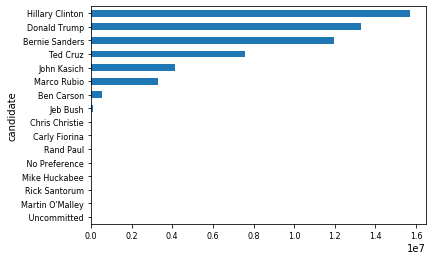

In [76]:
candidate_to_votes_s.plot(kind="barh",fontsize=8)

In [ ]:
#공화당과 민주당의 각 주별 득표비율

In [84]:
state_party_to_votes_s=primary.groupby(["state","party"])["votes"].sum()

In [85]:
state_party_to_votes_s.head() # 주별 공화당,민주당 투표값

state    party     
Alabama  Democrat      386327
         Republican    837632
Alaska   Democrat         539
         Republican     21930
Arizona  Democrat      399097
Name: votes, dtype: int64

In [86]:
state_votes_to_votes_s=primary.groupby("state")["votes"].sum()

In [88]:
state_votes_to_votes_s.head() # 주별 공화당과 민주당의 투표값 총합

state
Alabama       1223959
Alaska          22469
Arizona        834200
Arkansas       605971
California    4938197
Name: votes, dtype: int64

In [90]:
state_party_to_votes_pcts_s = state_party_to_votes_s / state_votes_to_votes_s

In [91]:
state_party_to_votes_pcts_s.head()

state    party     
Alabama  Democrat      0.315637
         Republican    0.684363
Alaska   Democrat      0.023989
         Republican    0.976011
Arizona  Democrat      0.478419
Name: votes, dtype: float64

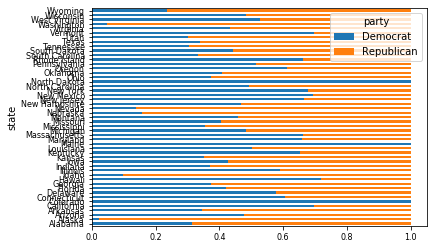

In [93]:
state_party_to_votes_pcts_s.unstack().plot(kind="barh",stacked=True,fontsize=8)
#party가 열로 올라감

In [ ]:
# 백인유권자 비율이 높을수록 공화당후보가 당선될 확률이 높은가?

In [99]:
func = lambda agg_df : agg_df.sort_values("votes",ascending=False).iloc[0]
# 집계 함수를 정의
# agg_df : 그룹화된 결과물을 명시
# votes열을 기준으로 sort , 내림차순 정렬 

In [100]:
primary.head()

,state,state_abbreviation,county,fips,party,candidate,votes,fraction_votes
0,Alabama,AL,Autauga,1001.0,Democrat,Bernie Sanders,544,0.182
1,Alabama,AL,Autauga,1001.0,Democrat,Hillary Clinton,2387,0.800
2,Alabama,AL,Baldwin,1003.0,Democrat,Bernie Sanders,2694,0.329
3,Alabama,AL,Baldwin,1003.0,Democrat,Hillary Clinton,5290,0.647
4,Alabama,AL,Barbour,1005.0,Democrat,Bernie Sanders,222,0.078


In [102]:
winners=primary.groupby("fips").agg(func)
#카운티를 나타내는 코드인 fips로 그룹화
#그룹에 해당하는 데이터 프레임에서 득표수가 가장많은 행을 추출

In [103]:
winners.head() # 카운티별 득표수가 가장 많은 행을 추출

,state,state_abbreviation,county,party,candidate,votes,fraction_votes
fips,,,,,,,
1001.0,Alabama,AL,Autauga,Republican,Donald Trump,5387,0.445
1003.0,Alabama,AL,Baldwin,Republican,Donald Trump,23618,0.469
1005.0,Alabama,AL,Barbour,Democrat,Hillary Clinton,2567,0.906
1007.0,Alabama,AL,Bibb,Republican,Donald Trump,1959,0.494
1009.0,Alabama,AL,Blount,Republican,Donald Trump,7390,0.487


In [105]:
counties.columns # RHI825214 : 해당 카운티에서 백인 유권자 비율

Index(['fips', 'area_name', 'state_abbreviation', 'PST045214', 'PST040210',
       'PST120214', 'POP010210', 'AGE135214', 'AGE295214', 'AGE775214',
       'SEX255214', 'RHI125214', 'RHI225214', 'RHI325214', 'RHI425214',
       'RHI525214', 'RHI625214', 'RHI725214', 'RHI825214', 'POP715213',
       'POP645213', 'POP815213', 'EDU635213', 'EDU685213', 'VET605213',
       'LFE305213', 'HSG010214', 'HSG445213', 'HSG096213', 'HSG495213',
       'HSD410213', 'HSD310213', 'INC910213', 'INC110213', 'PVY020213',
       'BZA010213', 'BZA110213', 'BZA115213', 'NES010213', 'SBO001207',
       'SBO315207', 'SBO115207', 'SBO215207', 'SBO515207', 'SBO415207',
       'SBO015207', 'MAN450207', 'WTN220207', 'RTN130207', 'RTN131207',
       'AFN120207', 'BPS030214', 'LND110210', 'POP060210'],
      dtype='object')

In [106]:
counties["RHI825214"].head()

0    62.1
1    66.2
2    75.6
3    83.0
4    46.6
Name: RHI825214, dtype: float64

In [107]:
counties[["fips","RHI825214"]].head() #fips가 열로 들어가있음

,fips,RHI825214
0,0,62.1
1,1000,66.2
2,1001,75.6
3,1003,83.0
4,1005,46.6


In [110]:
winners.head() #fips가 인덱스로 들어가있음

,state,state_abbreviation,county,party,candidate,votes,fraction_votes
fips,,,,,,,
1001.0,Alabama,AL,Autauga,Republican,Donald Trump,5387,0.445
1003.0,Alabama,AL,Baldwin,Republican,Donald Trump,23618,0.469
1005.0,Alabama,AL,Barbour,Democrat,Hillary Clinton,2567,0.906
1007.0,Alabama,AL,Bibb,Republican,Donald Trump,1959,0.494
1009.0,Alabama,AL,Blount,Republican,Donald Trump,7390,0.487


In [114]:
winners_county_races = pd.merge(winners,counties[["fips","RHI825214"]],
                                left_index=True,right_on="fips",how="left")
# RHI825214데이터가 붙음

In [115]:
winners_county_races.head()

,state,state_abbreviation,county,party,candidate,votes,fraction_votes,fips,RHI825214
2.0,Alabama,AL,Autauga,Republican,Donald Trump,5387,0.445,1001.0,75.6
3.0,Alabama,AL,Baldwin,Republican,Donald Trump,23618,0.469,1003.0,83.0
4.0,Alabama,AL,Barbour,Democrat,Hillary Clinton,2567,0.906,1005.0,46.6
5.0,Alabama,AL,Bibb,Republican,Donald Trump,1959,0.494,1007.0,74.5
6.0,Alabama,AL,Blount,Republican,Donald Trump,7390,0.487,1009.0,87.8


In [116]:
winners_county_races = winners_county_races.rename(columns={"RHI825214":"white_pcts"})
# 이름 재정의

In [117]:
winners_county_races.head() 

,state,state_abbreviation,county,party,candidate,votes,fraction_votes,fips,white_pcts
2.0,Alabama,AL,Autauga,Republican,Donald Trump,5387,0.445,1001.0,75.6
3.0,Alabama,AL,Baldwin,Republican,Donald Trump,23618,0.469,1003.0,83.0
4.0,Alabama,AL,Barbour,Democrat,Hillary Clinton,2567,0.906,1005.0,46.6
5.0,Alabama,AL,Bibb,Republican,Donald Trump,1959,0.494,1007.0,74.5
6.0,Alabama,AL,Blount,Republican,Donald Trump,7390,0.487,1009.0,87.8


In [ ]:
# 병합된 데이터로 '백인유권자 비율이 높을수록 공화당후보가 당선될 확률이 높은가?'를 구해보자

In [118]:
winners_county_white_pcts = winners_county_races.groupby(["party","candidate"])["white_pcts"].mean()
# 정당과 후보자에 대해 그룹화하고 white_pcts에 대해서 평균을 구하기

In [119]:
winners_county_white_pcts

party       candidate      
Democrat     No Preference           NaN
            Bernie Sanders     81.220541
            Hillary Clinton    54.609481
Republican  Donald Trump       84.008129
            John Kasich        89.226415
            Marco Rubio        76.628571
            Ted Cruz           73.480668
Name: white_pcts, dtype: float64

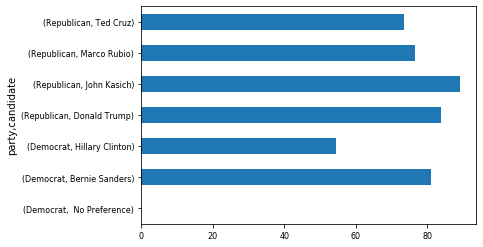

In [123]:
ax = winners_county_white_pcts.plot(kind="barh",fontsize=8)

In [122]:
ax.set_xlim([50,100])
plt.tight_layout()

<Figure size 432x288 with 0 Axes>

In [ ]:
# 피벗 테이블

In [125]:
total_votes = primary.pivot_table(values="votes",index="state" ,columns="candidate",aggfunc="sum",fill_value=0)
# value: 통계량을 계산할 열
# index: 인덱스
# columns : 열
# aggfunc :적용할 함수
# fill_value=0 :nan아 나오면 0으로 대체

In [126]:
total_votes

candidate,No Preference,Uncommitted,Ben Carson,Bernie Sanders,Carly Fiorina,Chris Christie,Donald Trump,Hillary Clinton,Jeb Bush,John Kasich,Marco Rubio,Martin O'Malley,Mike Huckabee,Rand Paul,Rick Santorum,Ted Cruz
state,,,,,,,,,,,,,,,,
Alabama,0,0,87517,76399,0,0,371735,309928,0,37970,159802,0,0,0,0,180608
Alaska,0,0,2401,440,0,0,7346,99,0,892,3318,0,0,0,0,7973
Arizona,0,0,0,163400,0,0,249916,235697,0,53040,0,0,0,0,0,132147
Arkansas,0,0,23173,64868,0,0,133144,144580,0,15098,101235,0,0,0,0,123873
California,0,0,0,1502043,0,0,1174829,1940580,0,176620,0,0,0,0,0,144125
Colorado,0,0,0,71928,0,0,0,49256,0,0,0,0,0,0,0,0
Connecticut,0,0,0,152410,0,0,123367,170075,0,60481,0,0,0,0,0,24969
Delaware,0,0,0,36659,0,0,42472,55950,0,14225,0,0,0,0,0,11110
Florida,0,0,0,566603,0,0,1077221,1097400,0,159412,636653,0,0,0,0,403640


In [127]:
primary.pivot_table(values="fraction_votes",index="state_abbreviation",columns="party",aggfunc="mean")
# 해당후보의 득표율을 주의 약어를 인덱스로 사용하고 정당을 열로 사용하여 평균을 구하여 나타냄

party,Democrat,Republican
state_abbreviation,,
AK,0.500000,0.200020
AL,0.477000,0.195310
AR,0.464973,0.191971
AZ,0.478433,0.283867
CA,0.492603,0.318644
CO,0.481016,NaN
CT,0.490006,0.325751
DE,0.492833,0.323444
FL,0.469821,0.242444
